(accel)=
# Acceleration and free fall

## Overview

Links to programs in this lesson:

1. [Ball with no acceleration](ball-no-accel)
1. [Ball with acceleration](ball-accel)
1. [Velocity and acceleration graphs](vel-accel-graphs)

Now that you have velocity under the belt, it is time to move on to acceleration. On the one hand, acceleration is more abstract than velocity. This is because acceleration is defined in terms of the change in velocity with time, while velocity is the change in position over time. So acceleration is the change in the change in the position over a time interval. As you will see when you program an accelerating object into vPython, if you are not careful with all those changes, you will get incorrect motion! Related to this is some confusion about the relation between velocity and acceleration. Sometimes there is a notion that "greater speed = greater acceleration", which is not true. We will examine the relationship between velocity and acceleration in this lesson.

On the other hand, you are very familiar with the perfect example of acceleration we see everyday: the acceleration of a falling object. Our brains are wired to understand what happens when we drop a tennis ball, for example, for a small time vs. a large one. We know that if we want to catch a ball that has fallen for twice the time, we don't put our hand twice as low as we would for the short time, but roughly three times lower. The ball does not display the motion of something in constant velocity, but of an object with velocity changing at a constant rate.

The idea of acceleration will tie all of this together. The plan is to define acceleration, and explore some of its aspects, then try to use this concept to model the motion of a ball moving vertically under the influence *only* of the gravitational force. This type of motion is known as *free fall*.

Here are the objectives for this lesson:

* State the definitions of average and instantaneous acceleration.
* Describe the difference between negative acceleration and deceleration.
* Define the gravitational field.
* Define the Euler-Cromer method for updating a group of kinematic variables.
* Describe how the graphs of velocity vs. time and acceleration vs. time for an object are related.

## Acceleration

### Definition of acceleration

Just as velocity is the change in position with time, **average acceleration** is the change in *velocity* with time. 

* **Quantity:** average acceleration
* **Symbol:** ${\vec a}_{avg}$
* **Definition:**

$$
	{\vec a}_{avg} = \frac{\Delta {\vec v}}{\Delta t} = \frac{{\vec v}_f - {\vec v}_i}{t_f - t_i}
$$

* **SI units:** m/s$^2$

When we take the limit $\Delta t \to 0$ of infinitely small time step, this gives the **instantaneous acceleration**.

````{admonition} Problem
:class: hint
Naval Auxiliary Air Station Charlestown in southern RI was where President George HW Bush learned to fly during WW2. One of its runways was a site for local drag racing in the late 1950's and early 1960's. It is now the site of a wildlife refuge. A drag racing vehicle crosses the finish line at 250. mph moving eastward and slows down uniformly to rest over 2.88 s. What was the magnitude of the vehicle's acceleration (in m/s$^2$)?

```{figure} ../img/231px-NAAS_Charlestown_c1945.jpg
---
height: 250px
---
Naval Auxiliary Air Station Charlestown seen from the air, circa 1945 ([source](https://commons.wikimedia.org/wiki/File:Naval_Auxiliary_Air_Station_Charlestown_circa_1945.jpg))
```
````

```{toggle}
*Answer:* 38.8 m/s$^2$ westward
```

The following problem has given quantities which are vectors pointing in different directions; you should write these variables in unit vector notation first, then use the definition of acceleration above to find the final velocity. Use the usual convention of east as the $+x$ direction, and north as the $+y$ direction.

```{admonition} Problem
:class: hint
An object is moving with a velocity of 17.5 m/s northward at $t = 0$, when it starts accelerating at a constant 4.55 m/s$^2$ westward. What is the object's velocity (in m/s) after 20.0 seconds?
```

```{toggle}
*Answer:* ${\vec v} = (-91.0 \textrm{ m/s}) {\hat x} + (17.5 \textrm{ m/s}) {\hat y}$
```
	
One way to think of acceleration is the following. Imagine a speedometer in your car, indicating the velocity of your car.

```{figure} ../img/Accelerometer.png
---
width: 50%
---
An accelerometer measuring the change in velocity of an object
```

If you increase your velocity from $+5$ m/s to $+20$ m/s in three seconds, your acceleration has a magnitude of 5 m/s$^2$. When your acceleration is constant, instantaneous acceleration is equal to average acceleration.

```{figure} ../img/INT_AY21_L03_Fig01-Two-moving-balls_small.png
---
width: 50%
---
Two balls moving to the right, one with constant velocity and one with constant acceleration
```

To see the difference between velocity and acceleration, consider the figure above. Each ball is moving to the right, and its position is shown every second. Thus, the motion shown is over five seconds (not six!). Both balls travel over the same displacement over the same time, so both have the same *average velocity*. But the way they do this is very different. The yellow ball has *equal* displacements every second, so its instantaneous velocity is also constant -- it moves with the same speed over the five seconds. The green ball has a changing displacement every second; the distance traveled increases every second, so its average velocity over the second time interval is greater than that for the first. Thus, it has an *increasing* average velocity. In fact, this increase is increasing at a constant rate. You can verify this by measuring the distances between the ball's position every second. This means the green ball has a constant *acceleration*.

````{admonition} Problem
:class: hint
Consider the four objects draw in the figure below. Each of these is moving to the right, and its position is shown every second.

```{figure} ../img/INT_AY21_L03_Fig03-Four-moving-balls_small.png
---
width: 50%
---
The position of four objects shown every second
```

1. Which of the objects has a constant velocity?
1. Which of the objects has a non-zero acceleration?
1. Which of the objects could have a *constant* acceleration?
````

```{toggle}
*Answer:* The blue ball is moving at a constant velocity, and thus a zero acceleration; the other three balls are moving with non-zero accelerations. Only the red ball could have a cosntant acceleration, since the other yellow and green balls have velocities that change at different rates at different locations.
```

### Negative acceleration and deceleration

In order to set up for acceleration vectors for use in [Lesson 06 (kinematics equations)](kin-eqns), let's talk about how the directions of the velocity and acceleration are related. For the green ball in the figure below, we can draw the position vectors ${\vec r}$ for the ball at two different times, and use those vectors to find the vector change in position $\Delta {\vec r}$. The average velocity is proportional in size to the displacement $\Delta {\vec r}$, and has the same direction, so this gives us the average velocities for each of the time intervals.

```{figure} ../img/INT_AY21_L03_Fig02-Finding-avg-vel-of-ball_small.png
---
width: 50%
---
Finding the direction of the average velocity over each second the green ball is moving
```

Notice that the change in position (the displacement) points to the right, since the ball is moving that way. This means the average velocity ${\vec v}_{avg}$ also points to the right as well. Because these differences are increasing in size, the average velocity is also increasing, so this ball is accelerating. You can see this in the figure below, where the change in (average) velocity is found between two displacements.

```{figure} ../img/INT_AY21_L03_Fig04-Change-in-avg-vel_small.png
---
width: 50%
---
The *average* velocity of the ball is increasing in size, since the gap between successive positions is getting larger. The acceleration points in the same direction as the average velocity.
```

```{admonition} Average vs. instantaneous velocity
:class: warning
We should be a little careful here when finding the acceleration. The definition

$$
    {\vec a}_{avg} = \frac{\Delta {\vec v}}{\Delta t}
$$

uses the change in the *instantaneous* velocity ${\vec v}$, not the *average* velocity ${\vec v}_{avg}$. So we are not being strictly accurate when we use the average velocity in the diagram. However, if you remember the mean value theorem from math class, there is some time $t$ within each time interval $\Delta t = t_f - t_i$ (where $t_i \le t \le t_f$) when the instantaneous velocity at $t$ is the same as the average velocity for all of $\Delta t$. We should be using these instantaneous velocities, but for the examples given here, the directions of the acceleration are the same.
```

Can we have a situation where the velocity and the acceleration point in opposite directions? Yes! This is known as **deceleration**. If we look at the figure below, with another ball moving to the right, we can go through the same process as above to find which way the change in velocity points (and thus, which way the acceleration points). In this case, the average velocity points to the right, but the change in velocity now points to the left.

```{figure} ../img/INT_AY21_L03_Fig05-Change-in-avg-vel_small.png
---
width: 50%
---
The *average* velocity of the ball is decreasing in size, since the gap between successive positions is getting smaller. The acceleration points in the opposite direction to the average velocity.
```

You may be familiar with the term "negative acceleration" -- is a negative acceleration just another way of saying "deceleration"? No! A **negative acceleration** simply means that the acceleration vector points in the negative direction! For the two examples above, let's assume (as we usually do) that left is the negative direction. Then our example of deceleration, for the gray ball, is also an example of negative acceleration. But this is not always true. Suppose we take the two situations above, and just reverse the direction of motion: assume that the green and gray balls are now moving to the *left*. If we find the change in the (average) velocity, we can find out the direction of the acceleration.

```{figure} ../img/INT_AY21_L03_Fig06-Change-in-avg-vel_small.png
---
width: 50%
---
The average velocities of two balls moving to the *left*
```

```{admonition} Negative acceleration is not so useful
:class: warning
The term "negative acceleration" is problematic it is really useful *only* when the motion is along a line. When we talk about more complicated motion, it does not make sense to say a vector is negative, only its vector components! Thus, it is more proper to talk about the negative $x$ component $a_x$ of the acceleration, rather than say the *entire* acceleration vector is negative.
```

```{admonition} Problem
:class: hint
For the image above, which of the balls has a deceleration? Which have a negative acceleration?
```

```{toggle}
*Answer:* The green ball has a deceleration, since the magnitude of its velocity is decreasing. The gray ball has a negative acceleration, since the direction of the change in velocity is to the left. On the other hand, the green ball has a positive acceleration; its acceleration vector points to the right.
```

````{admonition} Problem
:class: hint
The picture below shows four situations where a moving car is experiencing an acceleration; the arrows in each situation show the direction of the car's velocity and acceleration. If positive is to the right, in which of these situations does the car have a *negative acceleration*?

```{figure} ../img/Four-cars-vel-accel_small.png
---
height: 250px
---
Four possible relationships between velocity and acceleration for a moving car
```

1. Only B
1. Only C
1. Only D
1. Both B and C
1. Both B and D
````

```{toggle}
*Answer:* Cars B and D have acceleration vectors point to the left, in the negative direction.
```

```{admonition} Problem
:class: hint
Use the same picture for the previous problem to say in which of the situations given does the car have a *deceleration*?

1. Only B
1. Only C
1. Only D
1. Both B and C
1. Both B and D
```

```{toggle}
*Answer:* Cars B and C have acceleration vectors pointing in the direction opposite to their instanteous velocity vectors. Said another way, these are the two cars that are slowing down.
```

(accel:grav-field)=
### The gravitational field

As an example of acceleration, we will look at a ball falling towards the ground. Much like what we did earlier, this will have a constant *acceleration* (rather than velocity), so we will see how that affects the motion. We have a few steps before we get to that point. The program below creates a spherical object `ball`, much like we did before. Notice that we have added in `ball.velocity` inside the definition of `ball`, and started the ball at rest. It also creates an object `ground`. The `ground` object, using a new vPython module `box`, has its center at `ground.pos`, and its size describes its extent in the $x, y$ and $z$ direction. Thus, it has a width of 12 in both the $x$ and $z$ directions, and a vertical thickness of 0.2 in the $y$ direction.

Run the program, and see what the situation looks like.

(ball-no-accel)=
[Back to program list](accel)

In [1]:
from IPython.display import IFrame

IFrame(src="https://trinket.io/embed/glowscript/7f118cad1e?showInstructions=true", width="100%", height="600")

When you run the program, you notice nothing happens! The initial velocity `ball.velocity` is just the zero vector, and there is nothing in the code that ever changes this velocity. So the ball will just hang there motionless -- we need to add in the effect of gravity.

As I am sure you have noticed by now, if you ever hold up an object and then let go, the object will fall towards the center of the Earth. This leads to the following definition.

```{admonition} Gravitational field
:class: warning
The **gravitational field** ${\vec g}$ of the Earth is a measure of its gravitational influence on other objects. When the force of gravity between the Earth and an object is the *only* force acting on the object, the object will move with an acceleration ${\vec a} = {\vec g}$. When this is true, the object is said to be in **free fall**. Thus, ${\vec g}$ has the same units as ${\vec a}$.

It turns out that the Earth's gravitational field is very nearly constant near the surface of the Earth; we will see the more general case in [Lesson 21 (universal gravitation)](grav). Thus, we can say *the gravitational field vector near the surface of the Earth points towards the center of the Earth, and has a magnitude of 9.81 m/s$^2$*.
```

Therefore, we can start out with the fact that, if we neglect air resistance, the vertical acceleration $a_y$ is given by

$$
    a_y = -g
$$

```{admonition} Vectors vs. vector components
:class: warning
Notice what I did there -- the gravitational field vector is ${\vec g}$, and has both a magnitude and direction, while $g$ (no vector arrow above it), is *just* the magnitude, and no direction. The minus sign is because we choose downward to be in the $-y$ direction. Make sure you learn the difference in notation between scalars and vectors, and specifically between vectors and their magnitudes!
```

In order to truly have an object in free fall, one must eliminate all the other forces acting on the object. Dense objects -- such as the balls used in sports -- are pretty close to this already, but to see true free fall, air resistance must be taken out of the equation. This is done in a dramatic way in the next video. The video is automatically muted, so you don't accidently disrupt class, but if you are studying after class and have some headphones, feel free to watch.

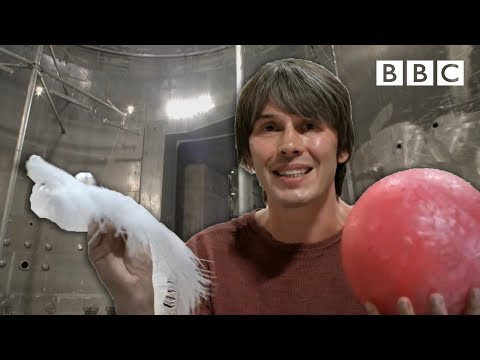

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('E43-CfukEgs', width = 600, height = 400, mute = 1)

## Updating the motion

### From acceleration to velocity

We can start from the constant acceleration in free fall, and build up to find the velocity and position of the object `ball` as it falls down towards the object `ground`. First, let's begin with acceleration. Since the acceleration is constant, we have ${\vec a}_{avg} = {\vec a}$. However, the velocity will be continually changing. So given a time $t = n \Delta t$, we want to calculate $v_{n, y}$, just like we did above, going from constant velocity to the positions $r_{n, x}$. So we have

$$
    {\vec a}_{avg} = \frac{{\vec v}_f - {\vec v}_i}{\Delta t} \Rightarrow
    a_y = \frac{v_{n + 1, y} - v_{n, y}}{\Delta t}
$$

and solving for the velocity at the end of the time step between $n \Delta t$ and $(n + 1) \Delta t$, we get

$$
    v_{n + 1, y} = v_{n, y} + a_y \Delta t
$$

This should look a lot like what we did earlier in the constant velocity case. In fact, if we draw a graph of acceleration versus time, we have a similar interpretation.

```{figure} ../img/Const-acc-update-graph-01_small.png
---
height: 150px
---
Finding the change in velocity $\Delta v_y$ from the acceleration $a_y$
```

Since downward is chosen to be negative, the constant acceleration line in the graph below is underneath the time axis. Other than that, the idea is the same. At a given time $t = n \Delta t$, the velocity in the $y$ direction changes from $v_{n, y}$ to $v_{n, y} + \Delta v_{n, y}$, where the change in velocity $\Delta v_{n, y}$ is given by

$$
    \Delta v_{n, y} = a_y \Delta t
$$

Thus, the relationship between acceleration and change in velocity is similar to that between velocity and change in position.

```{admonition} From acceleration to change in velocity
:class: warning
The area under the curve for an acceleration component vs. time graph is the change in that velocity component of the object. For example, the area under the curve for a $a_x$ vs. $t$ graph is the change $\Delta v_x$.
```

As you will see later, this will be a crucial relation in updating the velocity of an object in vPython, much like the analogous relation between displacement and average velocity let us change the position.

````{admonition} Problem
:class: hint
The graph below represents the acceleration of a particle as a function of time.  The initial velocity of the particle is 5.00 m/s in the $+x$ direction.

```{figure} ../img/INT_AY21_L03_Fig07-Acc-vs-t-graph_small.png
---
height: 150px
---
Use this acceleration vs. time graph to find information about the velocity and acceleration of an object
```

1. What is the instantaneous acceleration (in m/s$^2$) of the particle at $t$ = 6 s?
1. What is the change in velocity (in m/s) from $t$ = 4 s - 8 s?
1. What is the final velocity (in m/s) of the particle after 10 s?
````

```{toggle}
*Answers:* $+6.00$ m/s$^2$; $+24.0$ m/s; $+47.0$ m/s
```

So now, from our constant acceleration, we can construct the velocity vs. time graph for the falling ball. Since the ball is dropped from rest, and is speeding up downward, the velocity vs. time graph will have a constant negative slope. From the graph below, you can see that the slope is, in fact, just the $y$ component of the acceleration, since

$$
    a_y = \frac{\Delta v_y}{\Delta t}
$$

```{figure} ../img/Const-acc-update-graph-02_small.png
---
height: 250px
---
Updating the velocity of the object for a constant acceleration $a_y$
```

This gives us that

```{admonition} From velocity to acceleration
:class: warning
The slope of a velocity component vs. time graph for an object is the appropriate acceleration component of the object. For example, the slope of a $v_x$ vs. $t$ graph is the component $a_x$.
```

````{admonition} Problem
:class: hint
Use the velocity vs. time graph to answer the following questions.

```{figure} ../img/INT_AY19_MP1_L24_Fig01-Vel-vs-t-graph_small.png
---
height: 200px
---
Use this velocity vs. time graph to find information about the velocity and acceleration of an object
```

1. What is the average acceleration (in m/s$^2$) of the object between $t = 3$ s and $t = 7$ s?
1. What is the instantaneous acceleration (in m/s$^2$) of the object at $t = 5$ s?
````

```{toggle}
*Answers:* $-0.250$ m/s$^2$; $0.00$ m/s$^2$
```

### From velocity to position

Let's keep going, and use what we learned in [Lesson 03](vel-Euler:vel) about the relationship between velocity and change in position. Remember the task at hand: given the position $r_{n, y}$ and the velocity $v_{n, y}$ at a time $t = n \Delta t$, we now want to find the position $r_{n + 1, y}$ when time has moved forward one time step, i.e. at time $t = (n + 1) \Delta t$. We can already find the new velocity $v_{n + 1, y}$ at this new time, from the acceleration $a_y$ and the time step $\Delta t$. We found there that the area under the curve for a velocity vs. time graph gives the change in position, so how do we calculate this area? The graphs below show three different possibilities.

```{figure} ../img/Const-acc-update-graph-03_small.png
---
height: 250px
---
Three different possible ways to update position from a velocity graph, when acceleration is constant
```

At this point, you may be asking yourself, "Why are we using these rectangles? We know the slope is constant on this graph, why can't we use triangles?" And you would be right -- in *this* particular case, where the acceleration is constant, we could use our knowledge of the problem and come up with a better scheme. However, what I am trying to do here is motivate our choice without assuming anything about the slope. What if the slope were changing? What would we do then? You will only have the initial and final velocities, calculated using your acceleration, to find the change in position, so we need to develop a good all-purpose method for that. You will see that our "best choice" in the case of constant acceleration is also a good choice when acceleration is changing. In fact, if you have seen integral calculus before, you can see that the methods we use here are the basis for defining the integral of a function!

Going back to the graph above, the first method is to use the velocity $v_{n, y}$ at the old time $t = n \Delta t$, and find the new position using

$$
    v_{n, y} = \frac{r_{n + 1, y} - r_{n, y}}{\Delta t} \Rightarrow r_{n + 1, y} = r_{n, y} + v_{n, y} \Delta t
$$

After the new position is found, then we can also find the new velocity using the acceleration. In vPython code, this might look like

```python
ball.pos = ball.pos + ball.velocity * DT
ball.velocity = ball.velocity + ball.accel * DT
```

Using the `+=` operator, then this can be shortened to

```python
ball.pos += ball.velocity * DT
ball.velocity += ball.accel * DT
```

Thinking in terms of graphs and areas, this equation would give us the graph shown on the left-hand side. However, notice that the blue rectangles give us too small of an area -- there are "missing triangles" all along the red line. Physically, the interpretation is that the initial velocity $v_{n, y}$ is "too slow", and so the dropped ball is lagging behind where it should be along its path.

For second method, instead of using the initial velocity, we find the final velocity ${\vec v}_{n + 1}$ *first*, and then use it to find the new position. In equations, this would be

$$
    v_{n + 1, y} = \frac{r_{n + 1, y} - r_{n, y}}{\Delta t} \Rightarrow r_{n + 1, y} = r_{n, y} + v_{n + 1, y} \Delta t
$$

and in vPython,

```python
    ball.velocity += ball.accel * DT
    ball.pos += ball.velocity * DT
```

Notice the code looks very similar to the code above! All I have done is switched the order of these two statements. This is why the order of programming lines can be important. The first line updates `ball.velocity` to find $v_{n + 1, y}$, and with this updated `ball.velocity`, then uses it to find the new position `ball.pos`. This updating method is sometimes referred to as the **Euler-Cromer** method. If you go back to Cromer's original paper on the method, he says that the method was discovered by a student accidently reversing the two lines! We will frequently use this method of updating ${\vec r}$ and ${\vec v}$, since it works rather well for its simplicity.

However, looking at the right-hand graph in the figure above, you see there is still a problem -- now there are "extra triangles", and the area is too big. This means that we are using too large of a velocity, and the dropped ball is further along the path than it should be. This leads to the final method of updating, which is to take how we defined velocity seriously. Remember that the equation

$$
    {\vec v}_{avg} = \frac{\Delta {\vec r}}{\Delta t}
$$

says to use the *average* velocity when finding the change in position $\Delta {\vec r}$. For an object moving with constant acceleration -- and thus with velocity changing at a constant rate -- the average velocity is simply

$$
    {\vec v}_{avg} = \frac{1}{2} ({\vec v}_i + {\vec v}_f)
$$

For our case, this means that we update the position using

$$
    r_{n + 1, y} = r_{n, y} + \frac{1}{2} (v_{n, y} + v_{n + 1, y}) \Delta t
$$

Looking at the middle graph in the figure above, you'll see that this is the "Goldilocks" solution. This is known as the **midpoint approximation**. Although there are both missing and extra triangles on either side of the velocity vs. time curve, they cancel out, giving us the correct answer for the change in position $\Delta r_{n, y}$ from $r_{n, y}$ to $r_{n + 1, y}$.

To put this into programming code, it means that we have to save the old value $v_{n, y}$ of the velocity before we update it. If you think about it, there is no other way to order the two lines of code. Thus, the vPython implementation would be something like

```python
ball.oldvel = vector(ball.velocity)
ball.velocity += ball.accel * DT
ball.pos += + 0.5 * (ball.oldvel + ball.velocity) * DT
```

The midpoint approximation is more accurate than the Euler-Cromer method, but often, we can just use Euler-Cromer and not notice the difference.

Note that one way to make *any* of these methods work better is to decrease the size of the time step. If the rectangles are not as wide, the missing triangles become smaller as well, and the answer gets closer to the right one. This is essentially what is going on when we find the instantaneous velocity or acceleration -- by making $\Delta t \to 0$, we "find the slope" at a single time, rather than the average over a finite length of time. In terms of computation, reducing the time step `DT` makes the calculations more accurate, but also increases the number of such steps that must be done. There is a lot of effort in computational physics to find smarter ways of increasing the accuracy of simulations without slowing them down greatly. We will see some other methods of how this is done in future lessons.

(accel:vpy-freefall)=
## Modeling constant acceleration

### Creating a falling ball

Now that we have all of these ideas under our belt, let's see this in practice. The program below is a copy of the code from above, where the ball remained motionless because there was no gravitational field. However, there are some spots marked out for you to add in additional code. The instructions for this are given below the program.

(ball-accel)=
[Back to program list](accel)

In [3]:
from IPython.display import IFrame

IFrame(src="https://trinket.io/embed/glowscript/a917c3e721?showInstructions=true", width="100%", height="600")

You need to complete two steps before running the program above. Copy the three lines from above for the updating method using the midpoint approximation, and place it into the section "Update position, velocity". You now need to tell the computer what the ball's acceleration is! This will be the same as the gravitational field, so under "Definitions", type

```python
GRAV_FIELD = vector(0, -9.81, 0)
```
Then type the following line into the section "Define acceleration":

```python
ball.accel = GRAV_FIELD
```

Once you have done this, run the program above, and you should see the ball fall downward in a natural motion.

There's still a problem, though -- the computer doesn't know that the ball can't go through the ground! Your ball should fall right through the ground and keep going! So we need some way of dealing with the collision of the ball with the ground. One natural choice is for the ball to reverse the direction of its motion when it hits the ground. This means that if the vertical position of `ball` is now at or below the top surface of `ground`, then the vertical velocity component `ball.velocity.y` must switch signs (remember this scalar multiplication by $-1$ is how we switch the direction of a vector component 180$^\circ$).

In vPython, this would be written as

```python
if ball.pos.y < 0:
    ball.velocity.y = -ball.velocity.y
```

This uses an `if` statement, which tests whether a particular mathematical statement is true. Copy the statements above into the program, in the section "Check for ground collision". Make sure you have indented them properly -- the second line below has to be indented twice, since it is inside both the `while` loop and the `if` statement! Run the program again, and you should see the ball bouncing naturally on the ground.

Why did we use a less than sign `<`, rather than an equals sign `==`? Note that we are not sure that the ball will hit the $y$ position of the ground *exactly* during some part of the `while` loop, so we check to see only if it has gone beyond the ground. You may notice that in some cases, the ball looks like it sinks partway into the ground! It is possible to deal with collisions in a more sophisticated way than we do here, but I will not worry about this further.

### Visualizing velocity and acceleration

Let's continue to play around with this simulation, and get a better feeling for the relation between velocity and acceleration. The program below should be where you previously left the last program. There are now places to add code creating a graph, which you will do next. The instructions for doing this are after the program.

(vel-accel-graphs)=
[Back to program list](accel)

In [4]:
from IPython.display import IFrame

IFrame(src="https://trinket.io/embed/glowscript/dec3c3d759?toggleCode=true&showInstructions=true", width="100%", height="600")

You will now create graphs of the $y$ velocity vs. time, and the $y$ acceleration vs. time. Add in the required code to complete the following steps (it may be helpful to look back to [Lesson 03](vel-Euler:graphs) to see how to do this):

* In the "Create graph, curves" section, create a graph `yGraph`, with an `xmin` of 0, an `xmax` of `MAX_TIME`, and `xtitle = "t (s)"`.
* In the same section, create a blue curve `yVelCurve` and a red curve `yAccCurve`. Make sure you remember to link them to `yGraph` by using `graph = yGraph`. Add a label `label = "v_y (m/s)"` to `yVelCurve`, and `label = "a_y (m/s^2)"` to `yAccCurve`.
* Inside the `while` loop, in the "Update curves" section, use the appropriate equations to plot the $y$ velocity component `ball.velocity.y`, and the $y$ acceleration component `ball.accel.y`, both as a function of time.

Once you have done all of this, run the program, and see if the graphs look like what you expect.

```{admonition} Problem
:class: hint
Is the acceleration of the ball really constant the entire time? What is changing the acceleration of the ball?
```

```{toggle}
*Answer:* The acceleration of the ball changes at the instant it hits the ground. This gives an acceleration *different* from the gravitational field. You can see this in the velocity vs. time graph, since there is a sudden discontinuity in the value of `ball.velocity.y` that is not explained solely by ${\vec g}$. We will see later in the course that this is because of the force the ground exerts on the ball.
```

```{admonition} Problem
:class: hint
Change the initial velocity of the ball so it starts with an upward motion. What do the graphs look like now? Is the maximum velocity of the ball the same? What if the initial velocity is downward?
```

```{toggle}
*Answer:* The maximum velocity of the ball will have a different magnitude; this will be more pronounced, depending on how large you chose your value of $v_y$. If you use a negative velocity, with the same speed as your choice of positive velocity, the maximum speed will be the same in both cases. It will just reach that max speed at a different time for the two cases.
```

## Summary

Acceleration is the last of the three major quantities we will deal with repeatedly during this class -- the other two being displacement and velocity. We will see in [Lesson 11 (linear momentum and Newton's laws)](lin-mom-Newton) that acceleration is a key part of Newton's formulation of the laws of motion.

We also dealt with the gravitational field, which so is prevalent in our lives that we often do not think about its presence. Imagine how you would go about your daily routine if the gravitational field were absent! We will study the consequences of this field more in [Lesson 08 (projectile motion)](proj-mot). Much later in the course, we will come back to fields as a general idea. At that point, we will build on your intution about the gravitational field to talk about the electric and magnetic fields.

After this lesson, you should be able to:

* Define (average) acceleration and gravitational field.
* Relate the velocity vs. time and acceleration vs. time graphs of an object's motion.
* Create an accelerating object in vPython.